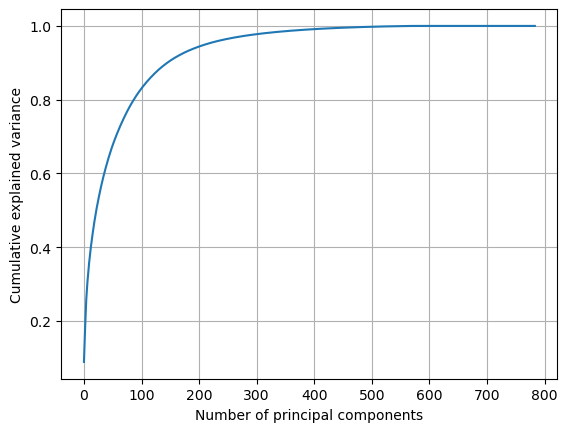

Premières classes:     [5 0 0 1 1 4 4 6 1 4 1 6 4 5 0 3 3 3 6 4]
Premières étiquettes:  [0 2 2 1 1 1 1 3 1 1 1 2 1 0 2 4 4 4 3 1]


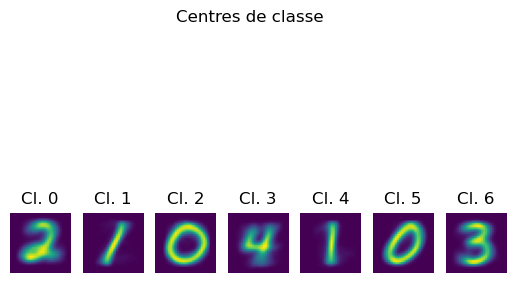



Classe................. 0 1 2 3 4 5 6
Etiquette majoritaire.. 2 1 0 4 1 0 3
Taux de mal classés: 0.099


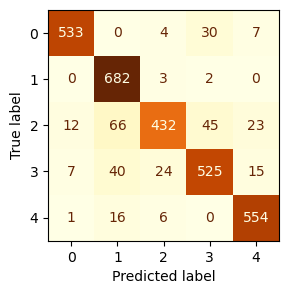

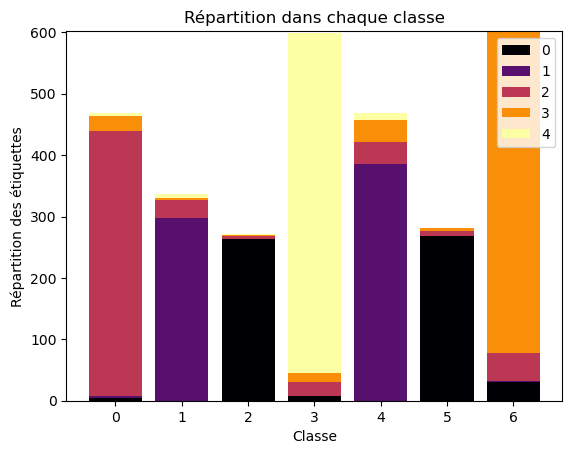

Matrice associée (conf_mat[etiq, classe]):

[[  4   0 264   7   0 269  30]
 [  3 297   0   0 385   0   2]
 [432  30   5  23  36   7  45]
 [ 24   3   1  15  37   6 525]
 [  6   6   1 554  10   0   0]]
   Une ligne = un digit
   Une colonne = une classe



In [3]:

import numpy as np
from sklearn.cluster import  KMeans
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Chargement des données ======================================================
dirdat=""
digits=np.loadtxt(dirdat+"digits_extrait_images.csv", delimiter=',',skiprows=1,usecols=range(1,785))
labels=np.loadtxt(dirdat+"digits_extrait_labels.csv", delimiter=',',skiprows=1,usecols=range(1,2))
labels=labels.astype(int)
#from sklearn.preprocessing import StandardScaler
#digits=StandardScaler().fit_transform(digits)
#
# ACP ICI
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ----- Standardization
Std = StandardScaler()
Xs = Std.fit_transform(digits)

# ----- PCA -----
pca = PCA()
Z = pca.fit_transform(Xs)   # Z = U·D (principal components)

#

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative explained variance")
plt.grid()
plt.show()

# Clustering avec la fonction KMeans du module scikit learn
# Le nombre de classes est choisi par défaut comme égal au nombre d'étiquettes
nclus=len(np.unique(labels))
nclus=len(np.unique(labels))+2
k_means = KMeans(init='k-means++', n_clusters=nclus, n_init=10)
k_means.fit(digits)

cl = k_means.labels_ # classes "prédites"
print('Premières classes:    ',cl[range(20)])
print('Premières étiquettes: ',labels[range(20)])

#  Images des centres de classe
plt.close('all')
fig=plt.figure(2)
plt.clf()
plt.suptitle("Centres de classe")
for k in range(k_means.n_clusters):
  plt.subplot(1,k_means.n_clusters,k+1)
  plt.imshow(np.reshape(k_means.cluster_centers_[k,:],[28,28]))
  plt.title("Cl. "+str(k))
  plt.axis('off')
plt.show()
# Calcul de l'étiquette majoritaire de chaque classe et du taux d'erreur
# On fabrique le tableau maj_lab qui a un nurmero de classe (p.ex. predit)
# renvoie l'etiquette correspondante.
maj_lab=np.arange(k_means.n_clusters) # Initialisation de tableau
for k in range(k_means.n_clusters):
  counts=np.unique(labels[cl==k],return_counts=True) # Nb d'occurences de chaque label
  imax=np.argmax(counts[1]) # Recherche du majoritaire dans k
  maj_lab[k]=counts[0][imax] # Son étiquette ya majoritaire dans k
print('\n')
print("Classe".ljust(23,'.')+" ",end='')
print(*range(k_means.n_clusters),end='')
print("\n"+"Etiquette majoritaire".ljust(23,'.')+" ",end='')
print(*(maj_lab))
err=sum(labels!=maj_lab[cl])/len(cl)
print("Taux de mal classés:",err.round(3))
# Matrice de confusion
# Rq: La matrice fournie par confusion_matrix est carrée:
#    On retire les lignes de zeros de conf_mat, dues au fait qu'il peut y avoir plus de classes que d'etiquettes
#    Et de meme avec les colonnes s'il y a moins de classes
conf_mat =  confusion_matrix(labels,maj_lab[cl])
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
plt.rcParams.update({'figure.figsize': (3,3),'font.size': 10})
ConfusionMatrixDisplay(conf_mat).plot(cmap='YlOrBr')
im = plt.gca().images[-1].colorbar.remove()
plt.rcdefaults()

# Représentation en barplot
def BarPlotMat(M):
# Fait un barplot pour chaque colonne de M.
# La couleur correspond à l'indice, la hauteur à la valeur
  I=M.shape[0]
  J=M.shape[1]
  ind = np.arange(J)
  haut = 0*M[0,:]
  for i in range(I):
    plt.bar(ind,M[i,:],bottom=haut,color=plt.cm.inferno(i/(I-1)))
    haut += M[i,:]
fig=plt.figure(3)
plt.clf()
conf_mat =  confusion_matrix(labels,cl)
conf_mat=conf_mat[np.sum(conf_mat,axis=1)>0,:]
conf_mat=conf_mat[:,np.sum(conf_mat,axis=0)>0]
BarPlotMat(conf_mat)
plt.xlabel('Classe')
plt.ylabel('Répartition des étiquettes')
plt.title('Répartition dans chaque classe')
plt.legend(['0','1','2','3','4',])
plt.show()
print("Matrice associée (conf_mat[etiq, classe]):\n")
print(conf_mat)
print("   Une ligne = un digit\n   Une colonne = une classe\n")




k=1, misclassification rate=0.773
k=2, misclassification rate=0.600
k=3, misclassification rate=0.427
k=4, misclassification rate=0.246
k=5, misclassification rate=0.104
k=8, misclassification rate=0.073
k=10, misclassification rate=0.067


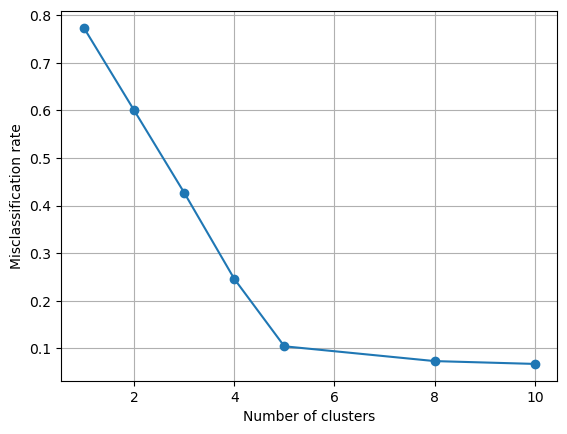

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

Ks = [1, 2,3,4, 5, 8, 10]
errs = []

for k in Ks:
    k_means = KMeans(n_clusters=k, n_init=10, random_state=0)
    k_means.fit(digits)
    cl = k_means.labels_

    maj_lab = np.zeros(k, dtype=int)
    for i in range(k):
        counts = np.unique(labels[cl == i], return_counts=True)
        maj_lab[i] = counts[0][np.argmax(counts[1])]

    err = np.mean(labels != maj_lab[cl])
    errs.append(err)
    print(f"k={k}, misclassification rate={err:.3f}")

plt.figure()
plt.plot(Ks, errs, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Misclassification rate")
plt.grid()
plt.show()


[Standardized] k=1, misclassification rate=0.773
[Standardized] k=2, misclassification rate=0.607
[Standardized] k=3, misclassification rate=0.459
[Standardized] k=4, misclassification rate=0.297
[Standardized] k=5, misclassification rate=0.135
[Standardized] k=8, misclassification rate=0.106
[Standardized] k=10, misclassification rate=0.107


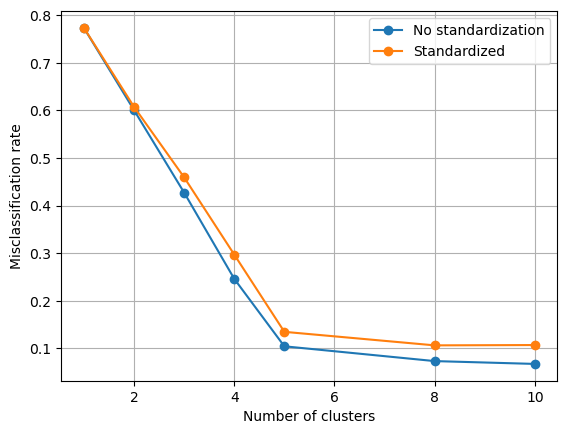

In [13]:
from sklearn.preprocessing import StandardScaler

Std = StandardScaler()
Xs = Std.fit_transform(digits)

errs_std = []

for k in Ks:
    k_means = KMeans(n_clusters=k, n_init=10, random_state=0)
    k_means.fit(Xs)
    cl = k_means.labels_

    maj_lab = np.zeros(k, dtype=int)
    for i in range(k):
        counts = np.unique(labels[cl == i], return_counts=True)
        maj_lab[i] = counts[0][np.argmax(counts[1])]

    err = np.mean(labels != maj_lab[cl])
    errs_std.append(err)
    print(f"[Standardized] k={k}, misclassification rate={err:.3f}")

plt.figure()
plt.plot(Ks, errs, marker='o', label='No standardization')
plt.plot(Ks, errs_std, marker='o', label='Standardized')
plt.xlabel("Number of clusters")
plt.ylabel("Misclassification rate")
plt.legend()
plt.grid()
plt.show()


Pixel intensities already have a meaningful common scale.
Standardization gives the same importance to background noise pixels as to informative pixels, which slightly deteriorates clustering performance.
- Standardization is not beneficial here

10 PCA components → misclassification rate=0.116
20 PCA components → misclassification rate=0.104
40 PCA components → misclassification rate=0.111
80 PCA components → misclassification rate=0.108
150 PCA components → misclassification rate=0.095


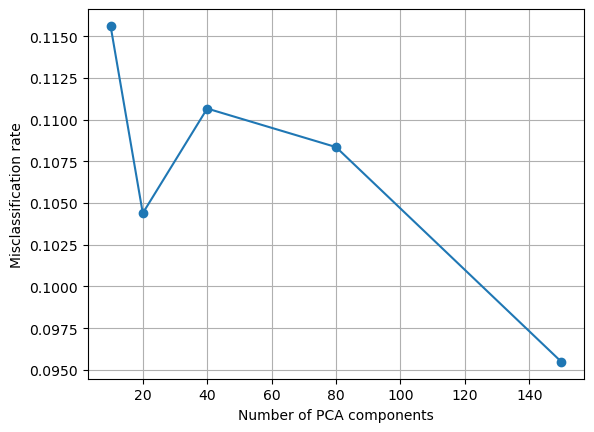

In [14]:
from sklearn.decomposition import PCA

# PCA already computed in your code:
# Z = pca.fit_transform(Xs)

n_components_list = [10, 20, 40, 80, 150]
errs_pca = []

for q in n_components_list:
    Zq = Z[:, :q]

    k_means = KMeans(n_clusters=10, n_init=10, random_state=0)
    k_means.fit(Zq)
    cl = k_means.labels_

    maj_lab = np.zeros(10, dtype=int)
    for i in range(10):
        counts = np.unique(labels[cl == i], return_counts=True)
        maj_lab[i] = counts[0][np.argmax(counts[1])]

    err = np.mean(labels != maj_lab[cl])
    errs_pca.append(err)
    print(f"{q} PCA components → misclassification rate={err:.3f}")

plt.figure()
plt.plot(n_components_list, errs_pca, marker='o')
plt.xlabel("Number of PCA components")
plt.ylabel("Misclassification rate")
plt.grid()
plt.show()


- A small number of components (≈20–40) already captures most discriminative information
- Too few components → loss of information
- Too many components → noise reintroduced
- Best trade-off around 20–40 components

['CarredelEst' 'Babybel' 'Beaufort' 'Bleu' 'Camembert' 'Cantal'
 'Chabichou' 'Chaource' 'Cheddar' 'Comte' 'Coulomniers' 'Edam' 'Emmental'
 'Fr.chevrepatemolle' 'Fr.fondu.45' 'Fr.frais20nat.' 'Fr.frais40nat.'
 'Maroilles' 'Morbier' 'Parmesan' 'Petitsuisse40' 'PontlEveque' 'Pyrenees'
 'Reblochon' 'Rocquefort' 'SaintPaulin' 'Tome' 'Vacherin'
 'Yaourtlaitent.nat.']
['calories' 'sodium' 'calcium' 'lipides' 'retinol' 'folates' 'proteines'
 'cholesterol' 'magnesium']

******* Classification Ascendante hiérarchique ******* 

----> !!! A vous de reflechir au seuil !!!

[ 33.64  37.47  38.03  45.01  49.66  58.46  59.84  61.06  70.17  80.85
  87.48  88.29  90.54  94.7   96.77 112.89 127.58 135.11 147.18 167.84
 168.68 182.17 219.67 236.78 238.93 356.97 571.06 825.49]
Classe 1  : Fr.frais40nat. Petitsuisse40
Classe 2  : Fr.frais20nat.
Classe 3  : Yaourtlaitent.nat.
Classe 4  : Beaufort
Classe 5  : Comte
Classe 6  : Emmental
Classe 7  : Cantal
Classe 8  : Parmesan
Classe 9  : Edam
Classe 10 : Vache

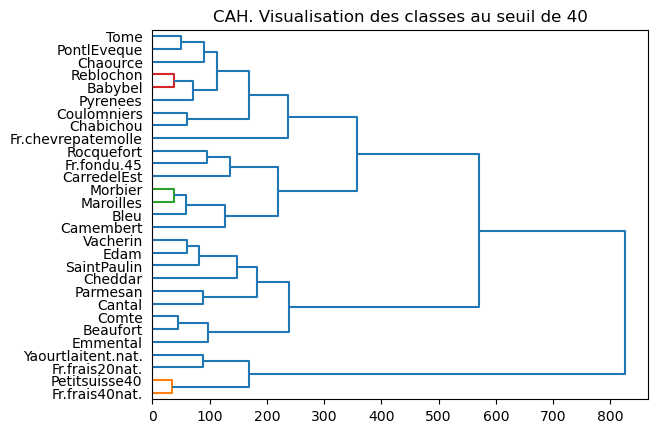

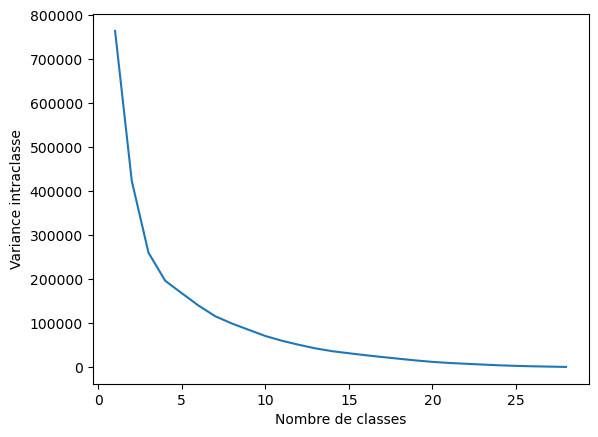

In [5]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import  KMeans

#### Importation des donnees, noms de fromage et noms de variable
fromages=np.loadtxt("fromages.dat",skiprows=1,usecols=range(1,10))
nomfrom=np.loadtxt("fromages.dat",dtype='str',usecols=0)[1:]
nomvar=np.loadtxt("fromages.dat",dtype='str',max_rows=1,usecols=range(1,10))
print(nomfrom)
print(nomvar)

##### Exemple de programation de CAH #####
print("\n******* Classification Ascendante hiérarchique ******* \n")

# Calcul de l'arbre
M=linkage(fromages,method='ward',metric='euclidean')

# Tracé de l'arbre
seuil=40
print("----> !!! A vous de reflechir au seuil !!!\n")
plt.figure()
plt.title('CAH. Visualisation des classes au seuil de '+str(seuil))
d=dendrogram(M,labels=list(nomfrom),orientation='right',color_threshold=seuil)
print(np.round(M[:,2],2))

##### Récupération des groupes
groupes=fcluster(M,t=seuil,criterion='distance')
for k in range(1,np.max(groupes)+1):
    print('Classe '+str(k).ljust(3,' ')+': ', end='')
    print(*nomfrom[np.where(groupes==k)])

#### Décroissance des variances intraclasse
VI=np.cumsum(M[:,2]**2)/2
plt.figure()
plt.plot(np.arange(len(VI))+1,np.flip(VI,axis=0))
plt.xlabel("Nombre de classes")
plt.ylabel("Variance intraclasse")
if 1==0: # Autre figure possible
  plt.figure()
  plt.plot(np.arange(len(VI/max(VI)))+1,np.flip(VI/max(VI),axis=0))
  plt.xlabel("Nombre de classes")
  plt.ylabel("Variance intraclasse/variance totale")

print("\n******* Kmeans ******* \n")

# Comparaison avec les Kmeans
nclus=np.max(groupes)
k_means = KMeans(init='k-means++', n_clusters=nclus, n_init=10)
k_means.fit(fromages)
for k in range(nclus):
    print('Classe '+str(k+1).ljust(3,' ')+': ', end='')
    print(*nomfrom[np.where(k_means.labels_==k)])

print("\n******* Comparaison des inerties ******* \n")

print("Inertie Kmeans",nclus,"centres: ",k_means.inertia_)
print("Inertie CAH",nclus,"classes: ",VI[-nclus])



In [9]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans

Std = StandardScaler()
fromages_s = Std.fit_transform(fromages)

# CAH on standardized data
M_s = linkage(fromages_s, method='ward')
seuil = 40
groupes_s = fcluster(M_s, t=seuil, criterion='distance')

print("CAH (standardized data):")
for k in range(1, np.max(groupes_s) + 1):
    print('Classe ' + str(k) + ': ', end='')
    print(*nomfrom[groupes_s == k])

# K-means on standardized data
nclus = np.max(groupes_s)
k_means = KMeans(n_clusters=nclus, n_init=10, random_state=0)
k_means.fit(fromages_s)

print("\nK-means (standardized data):")
for k in range(nclus):
    print('Classe ' + str(k+1) + ': ', end='')
    print(*nomfrom[k_means.labels_ == k])


CAH (standardized data):
Classe 1: CarredelEst Babybel Beaufort Bleu Camembert Cantal Chabichou Chaource Cheddar Comte Coulomniers Edam Emmental Fr.chevrepatemolle Fr.fondu.45 Fr.frais20nat. Fr.frais40nat. Maroilles Morbier Parmesan Petitsuisse40 PontlEveque Pyrenees Reblochon Rocquefort SaintPaulin Tome Vacherin Yaourtlaitent.nat.

K-means (standardized data):
Classe 1: CarredelEst Babybel Beaufort Bleu Camembert Cantal Chabichou Chaource Cheddar Comte Coulomniers Edam Emmental Fr.chevrepatemolle Fr.fondu.45 Fr.frais20nat. Fr.frais40nat. Maroilles Morbier Parmesan Petitsuisse40 PontlEveque Pyrenees Reblochon Rocquefort SaintPaulin Tome Vacherin Yaourtlaitent.nat.


In [16]:
from scipy.cluster.hierarchy import fcluster

k = 5  # number of cheese families
groupes = fcluster(M, t=k, criterion='maxclust')

for i in range(1, k+1):
    print(f"Classe {i}: ", end='')
    print(*nomfrom[groupes == i])


Classe 1: Fr.frais20nat. Fr.frais40nat. Petitsuisse40 Yaourtlaitent.nat.
Classe 2: Beaufort Comte Emmental
Classe 3: Cantal Cheddar Edam Parmesan SaintPaulin Vacherin
Classe 4: CarredelEst Bleu Camembert Fr.fondu.45 Maroilles Morbier Rocquefort
Classe 5: Babybel Chabichou Chaource Coulomniers Fr.chevrepatemolle PontlEveque Pyrenees Reblochon Tome


In [17]:
k_means = KMeans(n_clusters=k, n_init=20, random_state=0)
k_means.fit(fromages)

for i in range(k):
    print(f"Classe {i+1}: ", end='')
    print(*nomfrom[k_means.labels_ == i])


Classe 1: Fr.frais20nat. Fr.frais40nat. Petitsuisse40 Yaourtlaitent.nat.
Classe 2: Babybel Bleu Camembert Cantal Maroilles Morbier Parmesan Pyrenees Reblochon SaintPaulin
Classe 3: Chabichou Chaource Coulomniers Fr.chevrepatemolle PontlEveque Tome
Classe 4: Beaufort Cheddar Comte Edam Emmental Vacherin
Classe 5: CarredelEst Fr.fondu.45 Rocquefort


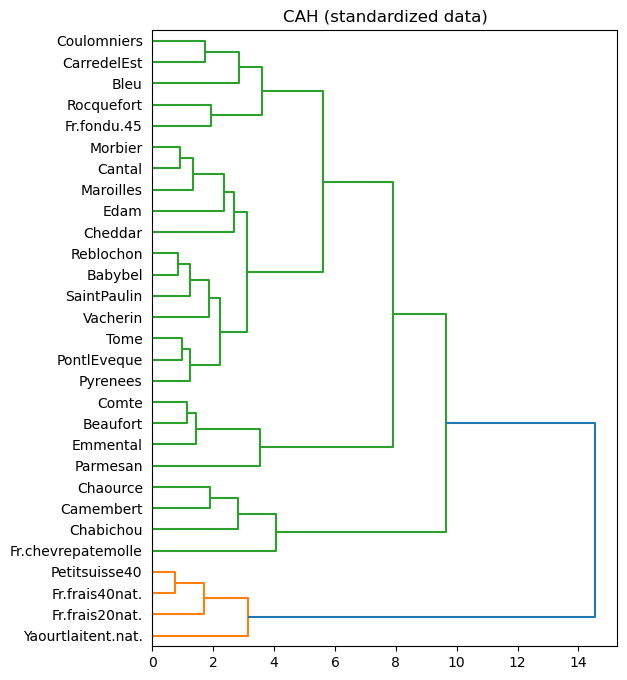

Classe 1: Fr.frais20nat. Fr.frais40nat. Petitsuisse40 Yaourtlaitent.nat.
Classe 2: Camembert Chabichou Chaource Fr.chevrepatemolle
Classe 3: Beaufort Comte Emmental Parmesan
Classe 4: Babybel Cantal Cheddar Edam Maroilles Morbier PontlEveque Pyrenees Reblochon SaintPaulin Tome Vacherin
Classe 5: CarredelEst Bleu Coulomniers Fr.fondu.45 Rocquefort


In [18]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Std = StandardScaler()
fromages_s = Std.fit_transform(fromages)

M_s = linkage(fromages_s, method='ward')

plt.figure(figsize=(6,8))
dendrogram(M_s, labels=list(nomfrom), orientation='right')
plt.title("CAH (standardized data)")
plt.show()

k = 5
groupes_s = fcluster(M_s, t=k, criterion='maxclust')

for i in range(1, k+1):
    print(f"Classe {i}: ", end='')
    print(*nomfrom[groupes_s == i])
